<H1 align='center'>HOSPITALIZATION ANALYSIS</H1>



<H3  align='center'>HEALTH DEPARTMENT OF FEDERAL DISTRICT</H3>


![](images/SES_DF.jpg)

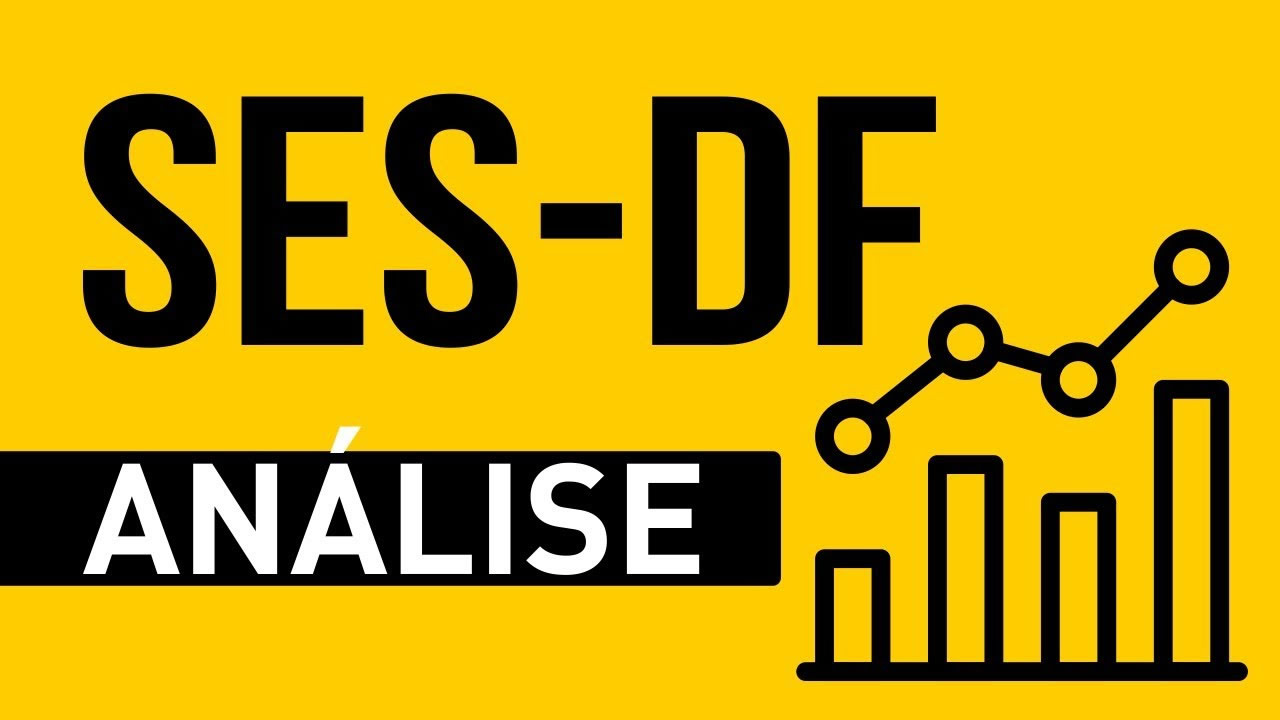

<div style="text-align: justify">This notebook is about data analysis of patients hospitalizations in all health institutions of Health Department of Federal District from year 2010 to 2018.

The data was obtained from DataSUS online platform (IT department of Unique Health System of Brazil). The data was collected from (.dbc) format, after that was decompressed to dBase III format and also transformed into Pandas Dataframes. Ultimately, was sent to (.csv) file.</div>

**Goals**

- Analyze the relations between hospitalizations and health institutions
- Check the origin of patients in institutions
- Relate the medical procedures costs and hospitalizations
- Predict the amount of hospitalizations in 2019 (Machine Learning).

The data visualization will be made on Microsoft Power BI. In this notebook, I'll just make data wrangling, the results will be visualized on Power BI.

**The Source of Data**

The data was collected from "Share files" link on Health Portal.

Link: <http://www2.datasus.gov.br/DATASUS/index.php?area=0901&item=1&acao=25>

The data is about 20 million of rows, after it'll be reduced.

**InovaSES**

![](images/INOVASES-DF.png)

This project get support from InovaSES  <http://www.saude.df.gov.br/inovases-quem-somos/>

Support to new ideas, innovative projects and entrepreneurship of Health Department Services.
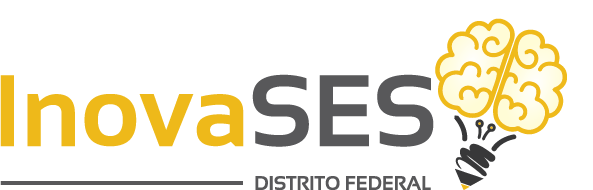

## 1- Get Data

**Import**

Import the libraries and relate dBase III files on "files" list using (glob) function.

In [2]:
import pandas as pd
from simpledbf import Dbf5
import glob
import numpy as np

In [3]:
files = glob.glob('DBF_NAIH\\*.dbf')
files[0:10]

['DBF_NAIH\\SPDF1001.dbf',
 'DBF_NAIH\\SPDF1002.dbf',
 'DBF_NAIH\\SPDF1003.dbf',
 'DBF_NAIH\\SPDF1004.dbf',
 'DBF_NAIH\\SPDF1005.dbf',
 'DBF_NAIH\\SPDF1006.dbf',
 'DBF_NAIH\\SPDF1007.dbf',
 'DBF_NAIH\\SPDF1008.dbf',
 'DBF_NAIH\\SPDF1009.dbf',
 'DBF_NAIH\\SPDF1010.dbf']

**Transformation of Data**

In order to manipulate (.dbf) files, the Project Simpledbf python library was chosen. This project is kept on PyPI Python repository: <https://pypi.org/project/simpledbf/>.

Therefore, using the library all (.dbf) files turned into Pandas Dataframes using the function Dbf5().to_dataframe(), excluding all selected columns from the list (columns_excl) and removing using (drop). After the transformation, each Dataframe was inserted into variable (df_int) list.

The codec "latin-1" was set due the information dBase III source format.

**The Original Dataset SUS**

The original dataset has 37 columns, but only 9 was selected to analysis.
The 9 columns:

- Hospitalization Year (SP_AA)
- Hospitalization Month (SP_MM)
- Health Institution Code (SP_CNES)
- Hospitalization Unique Code (SP_NAIH)
- Patient Admission Date (SP_DTINTER)
- Patient Discharge Date (SP_DTSAIDA)
- Amount of Professional Act (SP_QTD_ATO)
- Value of Professional Act (SP_VALATO)
- Origin of Patient (SP_DES_HOS)

In [4]:
df_int = []
columns_excl=['SP_GESTOR', 'SP_UF', 'SP_PROCREA', 'SP_NUM_PR', 'SP_TIPO',
       'SP_CPFCGC', 'SP_ATOPROF', 'SP_TP_ATO', 'SP_PTSP',
       'SP_NF', 'SP_M_HOSP', 'SP_M_PAC', 'SP_DES_PAC', 'SP_COMPLEX',
       'SP_FINANC', 'SP_CO_FAEC', 'SP_PF_CBO','SP_PF_DOC', 'SP_PJ_DOC', 
       'IN_TP_VAL', 'SEQUENCIA', 'REMESSA', 'SP_CIDPRI', 
       'SP_CIDSEC', 'SP_QT_PROC', 'SP_U_AIH']

for file in files:
    df_int.append(Dbf5(file, codec='latin-1').to_dataframe().drop(columns_excl,axis=1))
    
    print(file[-12:]+' processado.')

SPDF1001.dbf processado.
SPDF1002.dbf processado.
SPDF1003.dbf processado.
SPDF1004.dbf processado.
SPDF1005.dbf processado.
SPDF1006.dbf processado.
SPDF1007.dbf processado.
SPDF1008.dbf processado.
SPDF1009.dbf processado.
SPDF1010.dbf processado.
SPDF1011.dbf processado.
SPDF1012.dbf processado.
SPDF1101.dbf processado.
SPDF1102.dbf processado.
SPDF1103.dbf processado.
SPDF1104.dbf processado.
SPDF1105.dbf processado.
SPDF1106.dbf processado.
SPDF1107.dbf processado.
SPDF1108.dbf processado.
SPDF1109.dbf processado.
SPDF1110.dbf processado.
SPDF1111.dbf processado.
SPDF1112.dbf processado.
SPDF1201.dbf processado.
SPDF1202.dbf processado.
SPDF1203.dbf processado.
SPDF1204.dbf processado.
SPDF1205.dbf processado.
SPDF1206.dbf processado.
SPDF1207.dbf processado.
SPDF1208.dbf processado.
SPDF1209.dbf processado.
SPDF1210.dbf processado.
SPDF1211.dbf processado.
SPDF1212.dbf processado.
SPDF1301.dbf processado.
SPDF1302.dbf processado.
SPDF1303.dbf processado.
SPDF1304.dbf processado.


**General view of first Dataframe on list (df_int[0])**

In [5]:
df_int[0].head(50)

,SP_AA,SP_MM,SP_CNES,SP_NAIH,SP_DTINTER,SP_DTSAIDA,SP_QTD_ATO,SP_VALATO,SP_DES_HOS,SERV_CLA L
0,2010,01,0010456,5309101309644,20091203,20091218,1,239.23,1,NaN
1,2010,01,0010456,5309101309644,20091203,20091218,1,46.66,1,NaN
2,2010,01,0010456,5309101309644,20091203,20091218,1,13.99,1,NaN
3,2010,01,0010456,5309101309644,20091203,20091218,1,9.33,1,NaN
4,2010,01,0010456,5309101309644,20091203,20091218,1,42.00,1,NaN
5,2010,01,0010456,5309101309644,20091203,20091218,1,214.20,1,NaN
6,2010,01,0010456,5309101309644,20091203,20091218,15,93.34,1,NaN
7,2010,01,0010456,5309101309644,20091203,20091218,15,180.00,1,NaN
8,2010,01,0010456,5309101309644,20091203,20091218,11,267.13,1,NaN
9,2010,01,0010456,5309101309644,20091203,20091218,1,0.00,1,NaN


**Concatenation of Data**

For the best analysis, it's necessary to join all 108 Dataframes in just one, for this purpose the pandas function (concat) was chosen. For analysis the (SERV_CLAL) column was removed.

After de concatenation, at the moment there were 20379185 rows of data on only one Dataframe (df_int)

In [6]:
df_int = pd.concat(df_int)

In [7]:
df_int.drop(df_int.columns[9],axis=1,inplace=True)

In [8]:
df_int.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20376185 entries, 0 to 199618
Data columns (total 9 columns):
SP_AA         object
SP_MM         object
SP_CNES       object
SP_NAIH       object
SP_DTINTER    object
SP_DTSAIDA    object
SP_QTD_ATO    int64
SP_VALATO     float64
SP_DES_HOS    object
dtypes: float64(1), int64(1), object(7)
memory usage: 1.5+ GB


**Conversion** 

Conversion of (SP_CNES), (SP_NAIH), (SP_DES_HOS) to numeric format.

In [9]:
for col in ['SP_CNES','SP_NAIH','SP_DES_HOS']:
    df_int[col] = df_int[col].astype('int64')

In [10]:
df_int.isnull().sum()

SP_AA         0
SP_MM         0
SP_CNES       0
SP_NAIH       0
SP_DTINTER    0
SP_DTSAIDA    0
SP_QTD_ATO    0
SP_VALATO     0
SP_DES_HOS    0
dtype: int64

## 2- Monthly Value of Hospitalizations

**Monthly Value file**

For future analysis, was created another file with all values grouped by month and year.

It first group all data by year (SP_AA) and month (SP_MM) and aggregate the hospitalizations costs (SP_VALATO) applying the (sum) function. Therefore, make a (DATE) column getting information from (SP_AA) and (SP_MM).

In [12]:
df_value_month = df_int.groupby(['SP_AA','SP_MM'],as_index = False)['SP_VALATO'].sum()

In [13]:
df_value_month['DATE'] = pd.to_datetime(df_value_month['SP_AA'] + df_value_month['SP_MM'].apply(lambda x: x.zfill(2)), format='%Y%m')
df_value_month.drop(columns = ['SP_AA','SP_MM'],axis=1, inplace=True)

In [14]:
df_value_month.columns = ['VALOR_MENSAL','DATE']
df_value_month.to_csv('INT_VALOR_MENSAL.csv')

## 3- Data Manipulation

2 new Datasets will be created from rows and column manipulation.

- **Int_2010_to_2018.csv**: Dataset with all hospitalizations informations.
- **INT_VALOR_MENSAL.csv**: Dataset with all Monthly and Yearly values of hospitalizations.

**Grouping Rows**

The Dataframe has about 20 million of rows. In order to reduce that, the all data was grouped by (SP_NAIH) because it has unique numbers codes. In fact, the whole data was reduced to 1685512 million, for reach this goal the functions (groupby) and
(agg) was used to aggregate data by first parameter (first) and (sum).

In [25]:
df_int_new = df_int.groupby('SP_NAIH',as_index = False).agg({
                                 'SP_AA': 'first',
                                 'SP_MM': 'first',
                                 'SP_CNES':'first', 
                                 'SP_DTINTER': 'first',
                                 'SP_DTSAIDA': 'first',
                                 'SP_QTD_ATO': 'sum',
                                 'SP_VALATO': 'sum',
                                 'SP_DES_HOS': 'first'})

In [26]:
df_int_new.head()

,SP_NAIH,SP_AA,SP_MM,SP_CNES,SP_DTINTER,SP_DTSAIDA,SP_QTD_ATO,SP_VALATO,SP_DES_HOS
0,5309100004120,2010,01,10464,20091202,20100108,112,1199.71,0
1,5309100026318,2010,05,10464,20100410,20100422,35,447.68,0
2,5309100040783,2010,01,10464,20091117,20091119,4,262.54,0
3,5309100040838,2010,01,10464,20091116,20091123,20,834.02,0
4,5309100040849,2010,01,10464,20091109,20091116,29,538.45,0


In [27]:
#Rename the columns
df_int_new.columns = ['NAIH','ANO','MES','CNES','DTINTER','DTSAIDA','QTD_PROD','VALOR_AIH','DF']

In [28]:
df_int_new.head()

,NAIH,ANO,MES,CNES,DTINTER,DTSAIDA,QTD_PROD,VALOR_AIH,DF
0,5309100004120,2010,01,10464,20091202,20100108,112,1199.71,0
1,5309100026318,2010,05,10464,20100410,20100422,35,447.68,0
2,5309100040783,2010,01,10464,20091117,20091119,4,262.54,0
3,5309100040838,2010,01,10464,20091116,20091123,20,834.02,0
4,5309100040849,2010,01,10464,20091109,20091116,29,538.45,0


**Date Field**

In [29]:
df_int_new['DTSAIDA'] = pd.to_datetime(df_int_new['DTSAIDA'], format='%Y%m%d')
df_int_new['DTINTER'] = pd.to_datetime(df_int_new['DTINTER'], format='%Y%m%d')

In [30]:
#zfill function to fill with 0 the only one character months like January 1 or July 7
df_int_new['DATE'] = pd.to_datetime(df_int_new['ANO'] + df_int_new['MES'].apply(lambda x: x.zfill(2)) + '01', format='%Y%m%d')

In [31]:
df_int_new.head()

,NAIH,ANO,MES,CNES,DTINTER,DTSAIDA,QTD_PROD,VALOR_AIH,DF,DATE
0,5309100004120,2010,01,10464,2009-12-02,2010-01-08,112,1199.71,0,2010-01-01
1,5309100026318,2010,05,10464,2010-04-10,2010-04-22,35,447.68,0,2010-05-01
2,5309100040783,2010,01,10464,2009-11-17,2009-11-19,4,262.54,0,2010-01-01
3,5309100040838,2010,01,10464,2009-11-16,2009-11-23,20,834.02,0,2010-01-01
4,5309100040849,2010,01,10464,2009-11-09,2009-11-16,29,538.45,0,2010-01-01


In [32]:
#Remove the column ANO (Year) and MES (Month)
df_int_new.drop(columns = ['ANO','MES'],axis=1, inplace=True)

In [33]:
df_int_new

,NAIH,CNES,DTINTER,DTSAIDA,QTD_PROD,VALOR_AIH,DF,DATE
0,5309100004120,10464,2009-12-02,2010-01-08,112,1199.71,0,2010-01-01
1,5309100026318,10464,2010-04-10,2010-04-22,35,447.68,0,2010-05-01
2,5309100040783,10464,2009-11-17,2009-11-19,4,262.54,0,2010-01-01
3,5309100040838,10464,2009-11-16,2009-11-23,20,834.02,0,2010-01-01
4,5309100040849,10464,2009-11-09,2009-11-16,29,538.45,0,2010-01-01
5,5309100040904,10464,2009-11-27,2009-12-09,22,482.45,0,2010-01-01
6,5309100040970,10464,2009-12-08,2009-12-09,7,786.02,0,2010-01-01
7,5309100041069,10464,2009-12-04,2009-12-15,70,723.84,1,2010-01-01
8,5309100041135,10464,2009-12-13,2009-12-14,8,1040.19,0,2010-01-01
9,5309100041146,10464,2009-11-24,2009-12-01,24,834.02,1,2010-01-01


In [277]:
#Temporary save
df_int_new.to_csv("INT_2010_to_2018.csv", index=False )

**QTD_NAIH Field on INT_VALOR_MENSAL.csv**

*Reading the Datasets again*

In [34]:
df_int_new = pd.read_csv('INT_2010_to_2018.csv')


In [35]:
df_value_month_new = pd.read_csv('INT_VALOR_MENSAL.csv')

**Arranging Date field on datasets**

In [ ]:
df_int_new['DATE']= df_int_new['DATE'].apply(lambda x: x.split("-")[0]+"-"+x.split("-")[1])
df_value_month_new['DATE']= df_value_month_new['DATE'].apply(lambda x: x.split("-")[0]+"-"+x.split("-")[1])

In [41]:
df_int_new.head()

,NAIH,CNES,DTINTER,DTSAIDA,QTD_PROD,VALOR_AIH,DF,DATE
0,5309100004120,10464,2009-12-02,2010-01-08,112,1199.71,0,2010-01-01
1,5309100026318,10464,2010-04-10,2010-04-22,35,447.68,0,2010-05-01
2,5309100040783,10464,2009-11-17,2009-11-19,4,262.54,0,2010-01-01
3,5309100040838,10464,2009-11-16,2009-11-23,20,834.02,0,2010-01-01
4,5309100040849,10464,2009-11-09,2009-11-16,29,538.45,0,2010-01-01


**Variable (df_value_month_temp)**

New temporary variable to get grouped data by Date and aggregated by sum of hospitalizations (NAIH).

In [39]:
df_value_month_temp = df_int_new.groupby('DATE', as_index = False)['NAIH'].count()

In [40]:
df_value_month_temp.head()

,DATE,NAIH
0,2010-01-01,16302
1,2010-02-01,13506
2,2010-03-01,16704
3,2010-04-01,16422
4,2010-05-01,17032


**(QTD_NAIH) field**

Take the values from temporary variable to (INT_VALOR_MENSAL.csv)

In [40]:
df_value_month_new['QTD_NAIH'] = df_value_month_temp['NAIH']

In [51]:
#Remove "unnamed" column
df_value_month_new.drop(df_value_month_new.columns[df_value_month_new.columns.str.contains('unnamed',case = False)],axis = 1, inplace=True)

In [42]:
df_int_new.to_csv("INT_2010_to_2018.csv", index=False )

In [53]:
df_value_month_new.to_csv('INT_VALOR_MENSAL.csv', index=False)

## 4- Medical Procedures Groups

For visualize the medical procedures data, was created a dataset just to relate the raw (.dbf) dataset field (SP_ATOPROF) to new medical procedures group (GP_PROCED) and subgroup (SB_PROCED). (SP_ATOPROF) contains the Main medical procedure, the subprocedure and de specific procedure.

In order to create this column, was extracted the 10 characters of each row (SP_ATOPROF).
The meaning of these characters is:

- 2 first digits: Medical procedures Main Group - EG: 04 (Surgery Procedure)
- 4 first digits: Medical procedures Subgroup - EG: **04**03 (Surgery of the Central and Peripheral Nervous System)
- All 10 digits: Specific medical procedure - EG: **0403**010195 (Surgical Treatment of Intracranial Abscess)

**Original Dataset**

Read all (.dbf) files again but containing only 3 columns:

- Hospitalization Unique Code (SP_NAIH)
- Professional Act code (SP_ATOPROF)
- Value of Professional Act (SP_VALATO)

Ultimately, the **INT_PROCEDS.csv** will be created.

In [35]:
files = glob.glob('DBF_NAIH\\*.dbf')
files[0:10]

['DBF_NAIH\\SPDF1001.dbf',
 'DBF_NAIH\\SPDF1002.dbf',
 'DBF_NAIH\\SPDF1003.dbf',
 'DBF_NAIH\\SPDF1004.dbf',
 'DBF_NAIH\\SPDF1005.dbf',
 'DBF_NAIH\\SPDF1006.dbf',
 'DBF_NAIH\\SPDF1007.dbf',
 'DBF_NAIH\\SPDF1008.dbf',
 'DBF_NAIH\\SPDF1009.dbf',
 'DBF_NAIH\\SPDF1010.dbf']

In [36]:
df_int_prd = []
columns_excl_prd=['SP_GESTOR', 'SP_UF', 'SP_PROCREA', 'SP_NUM_PR', 'SP_TIPO',
       'SP_CPFCGC', 'SP_TP_ATO', 'SP_PTSP',
       'SP_NF', 'SP_M_HOSP', 'SP_M_PAC', 'SP_DES_PAC', 'SP_COMPLEX',
       'SP_FINANC', 'SP_CO_FAEC', 'SP_PF_CBO','SP_PF_DOC', 'SP_PJ_DOC', 
       'IN_TP_VAL', 'SEQUENCIA', 'REMESSA', 'SP_CIDPRI', 
       'SP_CIDSEC', 'SP_QT_PROC', 'SP_U_AIH', 'SP_AA', 'SP_MM', 'SP_CNES', 
       'SP_DTINTER', 'SP_DTSAIDA', 'SP_QTD_ATO', 'SP_DES_HOS']

for file in files:
    df_int_prd.append(Dbf5(file, codec='latin-1').to_dataframe().drop(columns_excl_prd,axis=1))
    
    print(file[-12:]+' processado.')

SPDF1001.dbf processado.
SPDF1002.dbf processado.
SPDF1003.dbf processado.
SPDF1004.dbf processado.
SPDF1005.dbf processado.
SPDF1006.dbf processado.
SPDF1007.dbf processado.
SPDF1008.dbf processado.
SPDF1009.dbf processado.
SPDF1010.dbf processado.
SPDF1011.dbf processado.
SPDF1012.dbf processado.
SPDF1101.dbf processado.
SPDF1102.dbf processado.
SPDF1103.dbf processado.
SPDF1104.dbf processado.
SPDF1105.dbf processado.
SPDF1106.dbf processado.
SPDF1107.dbf processado.
SPDF1108.dbf processado.
SPDF1109.dbf processado.
SPDF1110.dbf processado.
SPDF1111.dbf processado.
SPDF1112.dbf processado.
SPDF1201.dbf processado.
SPDF1202.dbf processado.
SPDF1203.dbf processado.
SPDF1204.dbf processado.
SPDF1205.dbf processado.
SPDF1206.dbf processado.
SPDF1207.dbf processado.
SPDF1208.dbf processado.
SPDF1209.dbf processado.
SPDF1210.dbf processado.
SPDF1211.dbf processado.
SPDF1212.dbf processado.
SPDF1301.dbf processado.
SPDF1302.dbf processado.
SPDF1303.dbf processado.
SPDF1304.dbf processado.


In [42]:
df_int_prd[0].head(20)

,SP_NAIH,SP_ATOPROF,SP_VALATO,SERV_CLA L
0,5309101309644,0408020407,239.23,NaN
1,5309101309644,0408020407,46.66,NaN
2,5309101309644,0408020407,13.99,NaN
3,5309101309644,0408020407,9.33,NaN
4,5309101309644,0408020407,42.00,NaN
5,5309101309644,0702030996,214.20,NaN
6,5309101309644,0301010170,93.34,NaN
7,5309101309644,0802010024,180.00,NaN
8,5309101309644,0802010199,267.13,NaN
9,5309101309644,0202020380,0.00,NaN


In [43]:
df_int_prd = pd.concat(df_int_prd)

In [49]:
#Remove (SERV_CLAL) column
df_int_prd.drop(df_int_prd.columns[3],axis=1,inplace=True)

**Association**

Association of the Professional Act (SP_ATOPROF) to the Group (GP_PROCED) and Subgroup (SB_PROCED)

In [45]:
df_int_prd['GP_PROCED'] = df_int_prd['SP_ATOPROF'].str[0:2]
df_int_prd['SB_PROCED'] = df_int_prd['SP_ATOPROF'].str[0:4]

In [47]:
#Remove column (SP_ATOPROF)
df_int_prd.drop(columns=['SP_ATOPROF'],inplace=True)

In [50]:
df_int_prd.head(20)

,SP_NAIH,SP_VALATO,GP_PROCED,SB_PROCED
0,5309101309644,239.23,04,0408
1,5309101309644,46.66,04,0408
2,5309101309644,13.99,04,0408
3,5309101309644,9.33,04,0408
4,5309101309644,42.00,04,0408
5,5309101309644,214.20,07,0702
6,5309101309644,93.34,03,0301
7,5309101309644,180.00,08,0802
8,5309101309644,267.13,08,0802
9,5309101309644,0.00,02,0202


In [51]:
df_int_prd.shape

(20376185, 4)

In [ ]:
df_int_prd.to_csv('INT_PROCEDS.csv')

## 5- MACHINE LEARNING (Time Series)

In order to make predictions about the amount of hospitalizations in Health Department in 2019, the amount of hospitalizations (QTD_NAIH) and the Monthly hospitalization value (VALOR_MENSAL) were collected from **INT_VALOR_MENSAL.csv**.

For making the prediction, the SARIMAX was used. This model is based on ARIMA (AR) auto-regressive and (MA) move averages used in time series.

The "S" on SARIMAX is the Seasonal component, to give periodicity to ARIMA where there is seasonality paterns on ranges of time.

**Import**

In [1]:
import warnings
from itertools import product
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
df_ts = pd.read_csv('INT_VALOR_MENSAL.csv')

In [3]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
VALOR_MENSAL    108 non-null float64
DATE            108 non-null object
QTD_NAIH        108 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.6+ KB


In [4]:
#Transformation of DATA into Timestamp
df_ts['DATE'] = pd.to_datetime(df_ts['DATE'])

In [5]:
df_ts.head(20)

,VALOR_MENSAL,DATE,QTD_NAIH
0,1.415236e+07,2010-01-01,16302
1,1.279796e+07,2010-02-01,13506
2,1.476611e+07,2010-03-01,16704
3,1.425150e+07,2010-04-01,16422
4,1.399232e+07,2010-05-01,17032
5,1.302971e+07,2010-06-01,15195
6,1.373143e+07,2010-07-01,15558
7,1.449289e+07,2010-08-01,15850
8,1.370897e+07,2010-09-01,15067
9,1.315430e+07,2010-10-01,14737


In [6]:
#Setting Date as index
df_ts = df_ts.set_index('DATE')

**Outliers**

Despite there are few outliers, there weren't reasons to remove because:

- There weren't many available data to machine learning model
- The distance of data isn't so far from the range

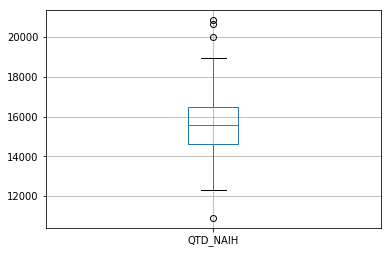

In [7]:
df_ts.boxplot(column='QTD_NAIH')

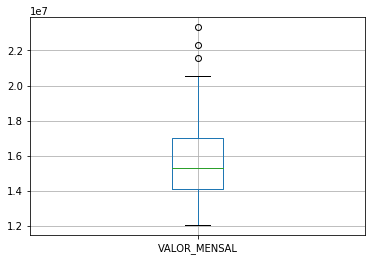

In [8]:
df_ts.boxplot(column='VALOR_MENSAL')

**Trend**

This chart has all data of hospitalizations split on months. Here, you can see a trend of 12 months (1 year) throughout data. The year start increasing the hospitalizations and after august this trend goes decreasing until December.

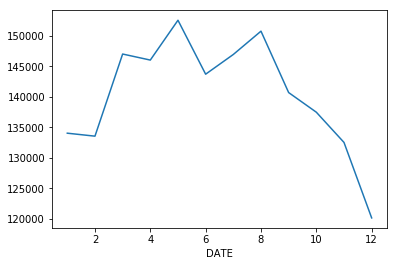

In [9]:
df_ts.groupby(df_ts.index.month)['QTD_NAIH'].sum().plot()

**SARIMAX Machine Learning Model**

The SARIMAX model is specified by:
$(p,d,q)×(P,D,Q)s$

- $(p,d,q)$ -> Trend Components Configuration (ARIMA)
- $(P,D,Q)$ -> Seasonality Components Configuration (SARIMA)
- $s$ -> Period configuration (Eg: 12 months, 30 days)

The model has s = 12 (12 months)

In order to find the best specification, an automatized method was used to test all combination of components (p,d,q,P,D,Q,s) on a 0, 1 range of values.

**AIC (results.aic)**

Each specification was scored with AIC score, that shows us how much the model fits on data (Lower is better).

In [10]:
p = d = q = range(0, 2)

In [11]:
pdq = list(product(p, d, q))

In [12]:
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(product(p, d, q))]

In [13]:
warnings.filterwarnings("ignore")
lower_aic = None

for param in pdq:

    for param_seasonal in seasonal_pdq:
            
        mod = sm.tsa.statespace.SARIMAX(df_ts['QTD_NAIH'],order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
        results = mod.fit()
        print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        
        if lower_aic == None:
            lower_aic = results.aic
            
        if lower_aic > results.aic:
                lower_aic = results.aic
                opt_pdq = param
                opt_pdq_seasonal = param_seasonal
            
print('The best model is: ',opt_pdq,'x',opt_pdq_seasonal,'  - AIC: ',lower_aic)

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2373.0627427670593
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2048.47696085024
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1693.0980430797858
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1481.9345473162273
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1711.5674742664999
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1693.465464599374
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1494.4830163401966
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1481.1573216789177
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2223.587708164753
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2005.7873379988866
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1643.280599005199
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1431.459321818493
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1690.8383982871746
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1639.536949733573
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1467.7274365462988
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1433.0544771219757
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1825.85063424484
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1608.8783471569827
A

**Results** 

After test all possibly combinations, the best configuration was:

$(p,d,q)×(P,D,Q)s$

(1, 1, 1) x (0, 1, 1, 12) - AIC: 1377

For the best visualization of model, plot_diagnostics function was used to analyze the charts (QQ Plot, KDE). The normal distribution fitting was confirmed from that. The (Standardized residual) show us a uniform variancy lying around 0. The (Correlogram) show us the residual erros aren't autocorrelates, this implies that there aren't error patterns without understanding inside the model. This model seems good to proceed.

In [14]:
mod = sm.tsa.statespace.SARIMAX(df_ts['QTD_NAIH'],
                                order=opt_pdq,
                                seasonal_order=opt_pdq_seasonal,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6097      0.140      4.353      0.000       0.335       0.884
ma.L1         -0.9047      0.083    -10.952      0.000      -1.067      -0.743
ma.S.L12      -0.7421      0.133     -5.580      0.000      -1.003      -0.481
sigma2      1.171e+06   2.14e+05      5.486      0.000    7.53e+05    1.59e+06


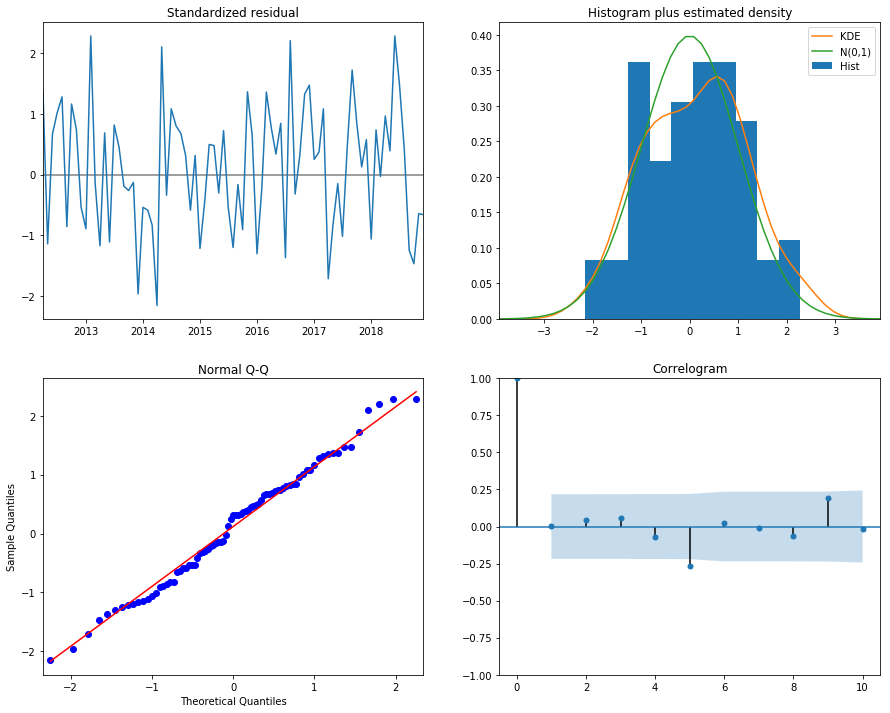

In [15]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [19]:
pred = results.get_prediction(start=1, dynamic=False)
pred_ci = pred.conf_int()

**Comparing the Models**

Here, is compared the machine learning model to real data.

The blue line is the real hospitalizations amount and green line is the machine learning prediction.

In [20]:
#Remove (VALOR_MENSAL) column
df_naih = df_ts.drop('VALOR_MENSAL', axis=1)

In [21]:
df_naih.head()

,QTD_NAIH
DATE,
2010-01-01,16302
2010-02-01,13506
2010-03-01,16704
2010-04-01,16422
2010-05-01,17032


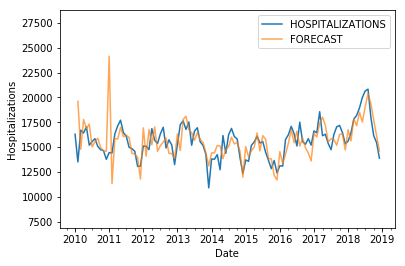

In [22]:
ax = df_naih['2010':].plot(label='Observed')

pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='w', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Hospitalizations')
plt.legend(["HOSPITALIZATIONS", "FORECAST"])

plt.show()

**Prediction**

Here, show us the real prediction after 2018 until December 2019.

In [23]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()

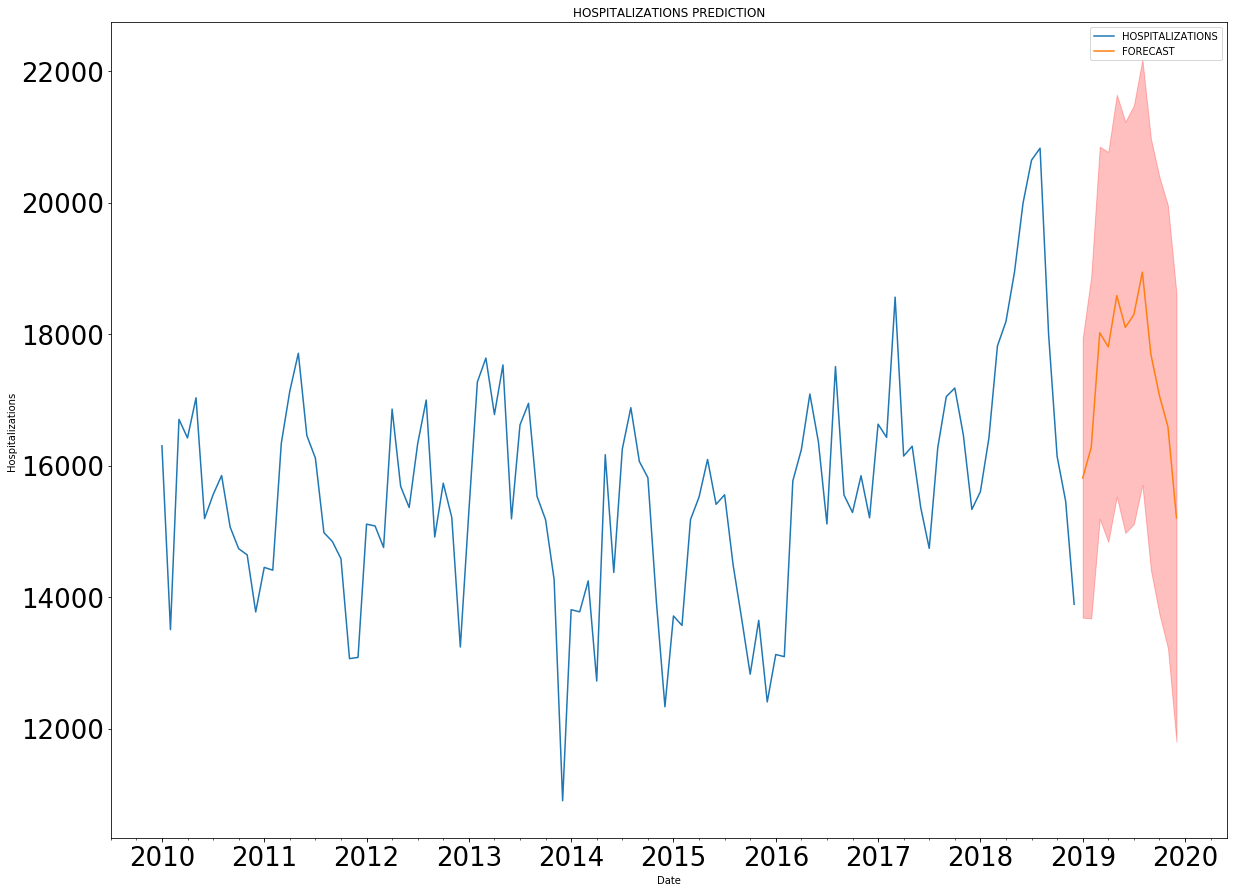

In [24]:
ax = df_naih.plot(label='Internações', figsize=(20, 15), fontsize=26, title='HOSPITALIZATIONS PREDICTION',legend=True)

pred_uc.predicted_mean.plot(ax=ax, label='Previsão')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='r', alpha=.25)

ax.set_xlabel('Date')
ax.set_ylabel('Hospitalizations')

ax.legend(["HOSPITALIZATIONS", "FORECAST"]);
plt.show()

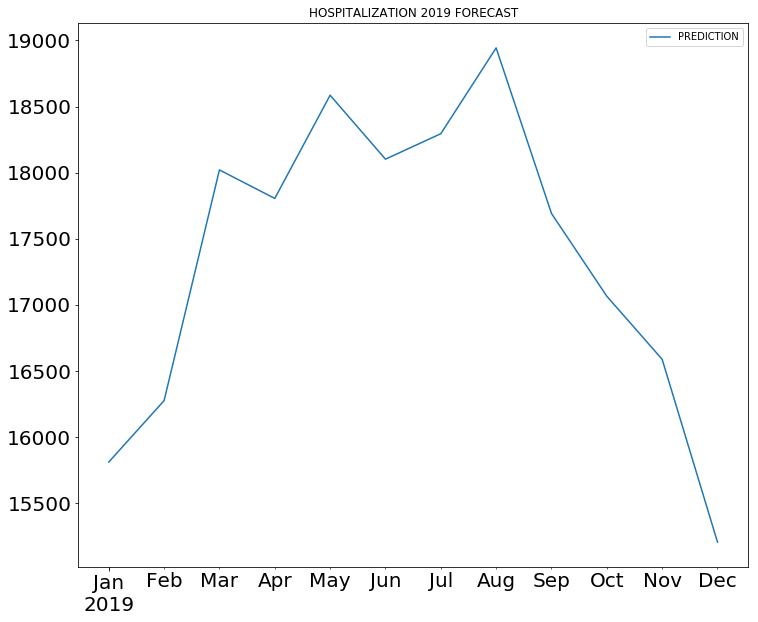

In [25]:
pred_uc.predicted_mean.plot(label='PREDICTION', figsize=(12, 10), fontsize=20, title='HOSPITALIZATION 2019 FORECAST',legend=True)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Hospitalizations')

plt.legend()
plt.show()

In [26]:
pred_uc.predicted_mean

2019-01-01    15812.790745
2019-02-01    16277.215300
2019-03-01    18021.247600
2019-04-01    17805.616444
2019-05-01    18585.949763
2019-06-01    18102.462898
2019-07-01    18294.819157
2019-08-01    18943.571679
2019-09-01    17692.120357
2019-10-01    17066.199199
2019-11-01    16589.551988
2019-12-01    15207.611193
Freq: MS, dtype: float64